In [83]:
#https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/code?datasetId=4538&sortBy=voteCount

#https://www.kaggle.com/code/janiobachmann/s-p-500-time-series-forecasting-with-prophet

#https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm

#https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python

#https://www.kaggle.com/code/shreyasajal/pytorch-forecasting-for-time-series-forecasting

In [84]:
!pip install -q yfinance

In [85]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

In [86]:
yf


<module 'yfinance' from '/opt/conda/lib/python3.7/site-packages/yfinance/__init__.py'>

In [87]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','TSLA']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN, TSLA]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","TESLA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-03-06,198.539993,198.600006,192.300003,193.809998,193.809998,128100100,TESLA
2023-03-07,191.380005,194.199997,186.100006,187.710007,187.710007,148125800,TESLA
2023-03-08,185.039993,186.500000,180.000000,182.000000,182.000000,151897800,TESLA
2023-03-09,180.250000,185.179993,172.509995,172.919998,172.919998,170023800,TESLA
2023-03-10,175.130005,178.289993,168.440002,173.440002,173.440002,191007900,TESLA
2023-03-13,167.460007,177.350006,163.910004,174.479996,174.479996,167790300,TESLA
2023-03-14,177.309998,183.800003,177.139999,183.259995,183.259995,143717900,TESLA
2023-03-15,180.800003,182.339996,176.029999,180.449997,180.449997,145995600,TESLA
2023-03-16,180.369995,185.809998,178.839996,184.130005,184.130005,121136800,TESLA


In [88]:
df.sample(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-09-15,249.770004,251.399994,244.020004,245.380005,244.079086,31530900,MICROSOFT
2022-07-06,263.750000,267.989990,262.399994,266.209991,264.237762,23824400,MICROSOFT
2022-12-22,85.519997,85.680000,82.250000,83.790001,83.790001,81431300,AMAZON
2022-11-07,208.649994,208.899994,196.660004,197.080002,197.080002,93916500,TESLA
2022-05-05,313.006653,315.200012,285.899994,291.093323,291.093323,92519100,TESLA
2022-06-02,147.830002,151.270004,146.860001,151.210007,150.520370,72348100,APPLE
2022-04-25,144.022995,146.221497,142.306503,146.074005,146.074005,61874000,AMAZON
2022-05-10,155.520004,156.740005,152.929993,154.509995,153.805298,115366700,APPLE
2022-10-03,235.410004,241.610001,234.660004,240.740005,239.463684,28880400,MICROSOFT


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1250 entries, 2022-03-21 to 2023-03-17
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1250 non-null   float64
 1   High          1250 non-null   float64
 2   Low           1250 non-null   float64
 3   Close         1250 non-null   float64
 4   Adj Close     1250 non-null   float64
 5   Volume        1250 non-null   int64  
 6   company_name  1250 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.1+ KB


In [90]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1.250000e+03
mean,172.967517,175.899954,169.947594,172.918717,172.536604,6.457980e+07
std,70.383226,71.601505,68.945963,70.215596,69.861279,4.241194e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,8.567800e+06
25%,113.557503,115.737753,111.865749,113.692499,113.692499,2.962680e+07
50%,148.720001,150.760002,147.024994,148.875000,148.561256,5.815275e+07
75%,239.994999,243.785004,235.482502,240.302502,239.705597,8.413265e+07
max,378.766663,384.290009,362.433319,381.816681,381.816681,3.065906e+08


In [91]:
TSLA.describe()
#We have only 255 records in one year because weekends are not included in the data.

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,235.408546,241.138680,228.944934,234.837747,234.837747,1.080972e+08
std,63.085559,63.979007,61.906808,62.725632,62.725632,4.975553e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,190.930000,195.769997,185.747501,190.912495,190.912495,7.195425e+07
50%,232.223335,238.985001,224.683334,232.831665,232.831665,9.214500e+07
75%,289.029991,295.099998,280.465012,288.150009,288.150009,1.389887e+08
max,378.766663,384.290009,362.433319,381.816681,381.816681,3.065906e+08


<Figure size 1500x1000 with 0 Axes>

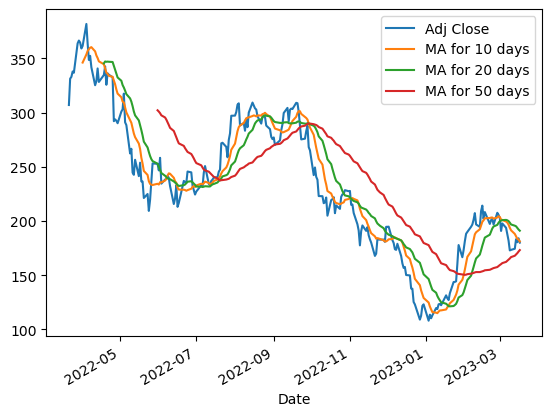

In [92]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
#fig.set_title('TESLA')

fig.tight_layout()

In [93]:
# prediction

# Get the stock quote
df = pdr.get_data_yahoo('TSLA', start='2018-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000
...,...,...,...,...,...,...
2023-03-13,167.460007,177.350006,163.910004,174.479996,174.479996,167790300
2023-03-14,177.309998,183.800003,177.139999,183.259995,183.259995,143717900
2023-03-15,180.800003,182.339996,176.029999,180.449997,180.449997,145995600


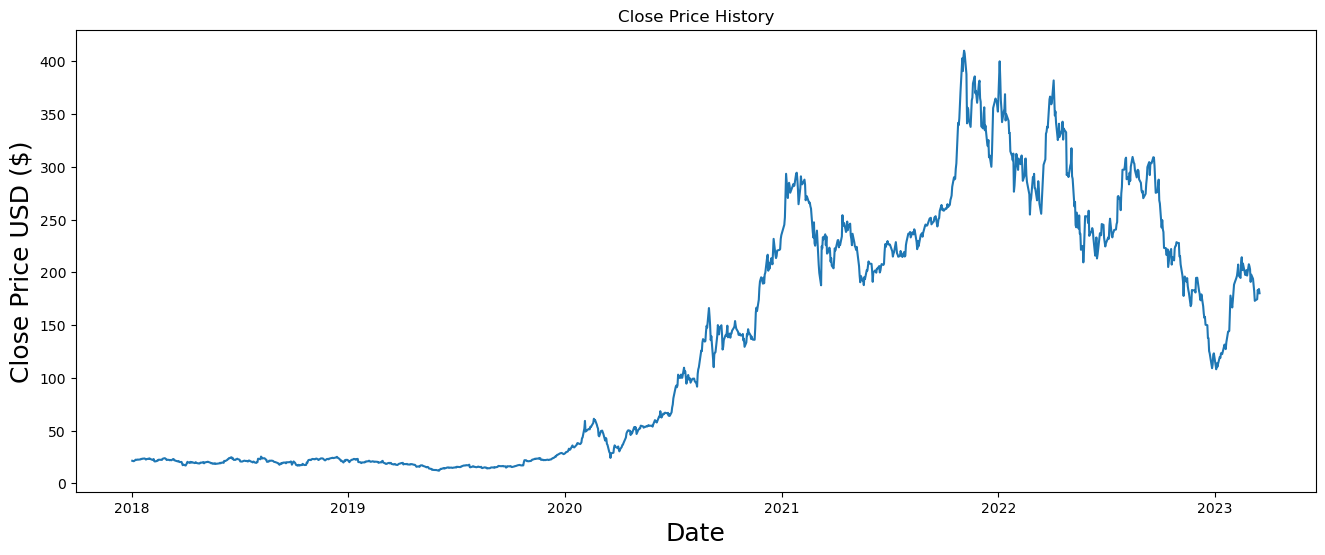

In [94]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [95]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1246

In [96]:
data.head()

,Close
Date,
2018-01-02,21.368668
2018-01-03,21.150000
2018-01-04,20.974667
2018-01-05,21.105333
2018-01-08,22.427334


In [97]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02370959],
       [0.02316023],
       [0.02271974],
       ...,
       [0.4233726 ],
       [0.43261795],
       [0.42256867]])

In [98]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02370959, 0.02316023, 0.02271974, 0.02304801, 0.0263693 ,
       0.02591373, 0.02609964, 0.02662723, 0.02633748, 0.02698063,
       0.02816979, 0.027736  , 0.02864881, 0.02890674, 0.02911275,
       0.02795709, 0.02657531, 0.02744792, 0.02856674, 0.02794536,
       0.02936733, 0.02851984, 0.02759866, 0.02581994, 0.02596063,
       0.02780802, 0.0228219 , 0.02201629, 0.02290565, 0.02423383,
       0.02400772, 0.02597738, 0.02621521, 0.02609462, 0.02584841,
       0.02800398, 0.02898881, 0.02988822, 0.02881127, 0.02748309,
       0.02545147, 0.02615324, 0.02585679, 0.02499422, 0.02568092,
       0.02514496, 0.02482171, 0.02789344, 0.02727876, 0.02473127,
       0.02455876, 0.02384693, 0.0225422 , 0.02203806, 0.02303964,
       0.0217952 , 0.020529  , 0.02097117, 0.01678396, 0.01319972])]
[0.014598249993150625]

[array([0.02370959, 0.02316023, 0.02271974, 0.02304801, 0.0263693 ,
       0.02591373, 0.02609964, 0.02662723, 0.02633748, 0.02698063,
       0.02816979, 0.027736  , 0.0

In [99]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1186/1186 [==============================] - 44s 34ms/step - loss: 0.0030


array([[160.94999695],
       [156.80000305],
       [157.66999817],
       [150.22999573],
       [149.86999512],
       [137.80000305],
       [137.57000732],
       [125.34999847],
       [123.15000153],
       [109.09999847],
       [112.70999908],
       [121.81999969],
       [123.18000031],
       [108.09999847],
       [113.63999939],
       [110.33999634],
       [113.05999756],
       [119.76999664],
       [118.84999847],
       [123.22000122],
       [123.55999756],
       [122.40000153],
       [131.49000549],
       [128.77999878],
       [127.16999817],
       [133.41999817],
       [143.75      ],
       [143.88999939],
       [144.42999268],
       [160.27000427],
       [177.8999939 ],
       [166.66000366],
       [173.22000122],
       [181.41000366],
       [188.27000427],
       [189.97999573],
       [194.75999451],
       [196.80999756],
       [201.28999329],
       [207.32000732],
       [196.88999939],
       [194.63999939],
       [209.25      ],
       [214

In [100]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3/3 [==============================] - 1s 23ms/step


14.58629264951912

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


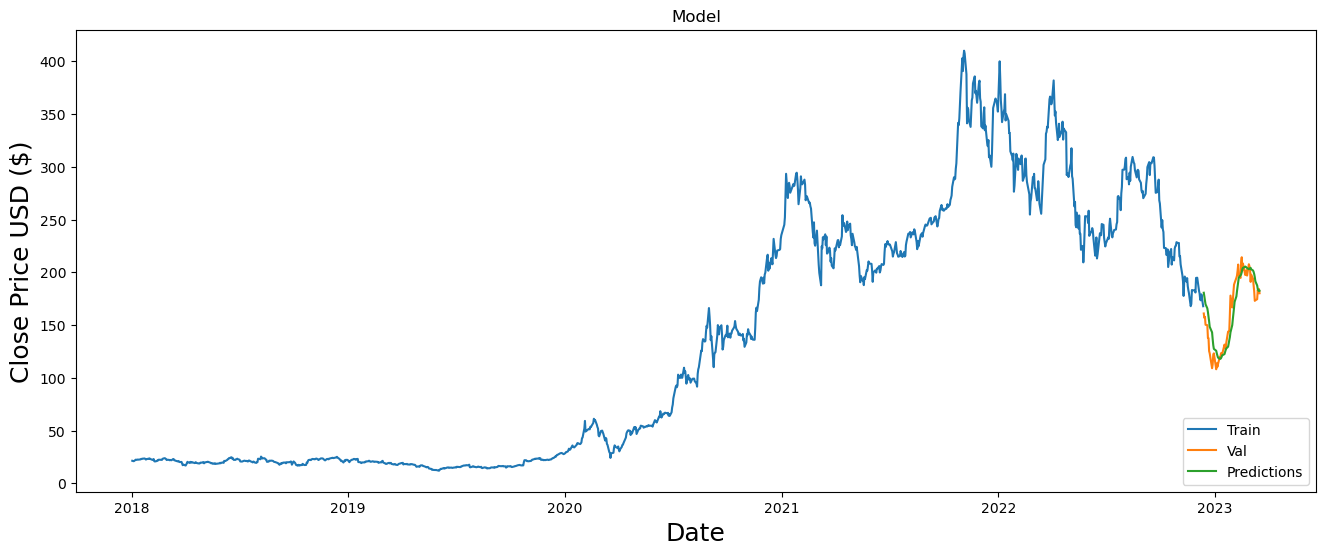

In [101]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# ARIMA

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1311
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3170.107
Date:                Sun, 19 Mar 2023   AIC                           6352.214
Time:                        12:37:24   BIC                           6383.281
Sample:                             0   HQIC                          6363.866
                               - 1311                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0189      0.021     -0.880      0.379      -0.061       0.023
ar.L2          0.0245      0.024      1.010      0.313      -0.023       0.072
ar.L3         -0.0442      0.021     -2.067      0.0

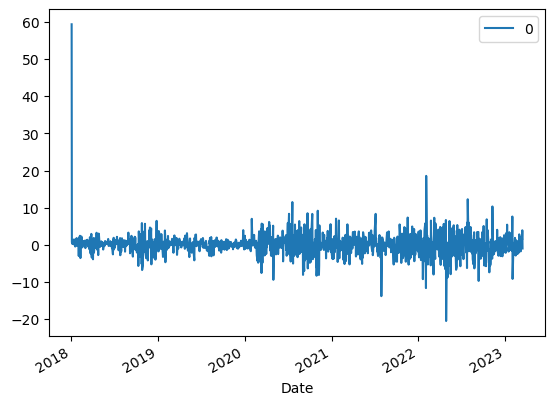

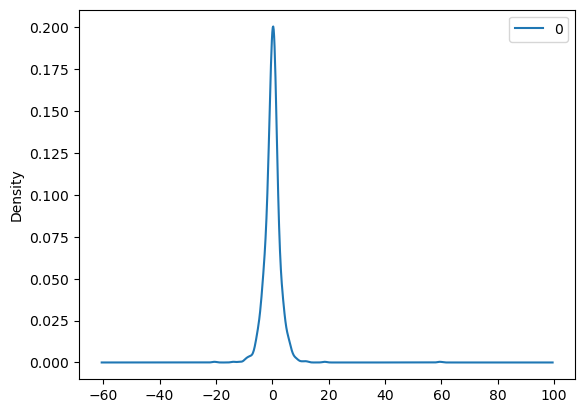

                 0
count  1311.000000
mean      0.076221
std       3.177391
min     -20.566192
25%      -1.251696
50%       0.118489
75%       1.295144
max      59.450500


In [102]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA (series, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print (residuals.describe())

In [103]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

array([[0.74650706],
       [0.74565288],
       [0.72573013],
       [0.69505474],
       [0.66174137],
       [0.66344981],
       [0.68086016],
       [0.69309514],
       [0.64385367],
       [0.63641723],
       [0.57901073],
       [0.59669748],
       [0.57501616],
       [0.56828316],
       [0.53044765],
       [0.53017129],
       [0.51394169],
       [0.51580082],
       [0.527056  ],
       [0.48502492],
       [0.52110182],
       [0.52321216],
       [0.52785992],
       [0.49077811],
       [0.50876632],
       [0.50075202],
       [0.52881462],
       [0.53439197],
       [0.5355225 ],
       [0.54413978],
       [0.54167768],
       [0.54238116],
       [0.51012296],
       [0.51095203],
       [0.49125546],
       [0.46515247],
       [0.45063127],
       [0.41618736],
       [0.44917412],
       [0.46236379],
       [0.44975194],
       [0.45846969],
       [0.4396273 ],
       [0.43020611],
       [0.42271941],
       [0.39176762],
       [0.39689277],
       [0.430

In [111]:
series = data
result = seasonal_decompose(series, model='additive',period=1) # The frequncy is daily
figure = result.plot()

,Close
Date,
2018-01-02,21.368668
2018-01-03,21.150000
2018-01-04,20.974667
2018-01-05,21.105333
2018-01-08,22.427334
...,...
2023-03-13,174.479996
2023-03-14,183.259995
2023-03-15,180.449997


In [132]:
valid = np.reshape(valid, (valid.shape[0], valid.shape[1], 1))


IndexError: tuple index out of range

In [119]:
train

array([[ 21.3686676 ],
       [ 21.14999962],
       [ 20.9746666 ],
       ...,
       [173.44000244],
       [179.05000305],
       [167.82000732]])

In [123]:
valid['Close']

Date
2022-12-13    160.949997
2022-12-14    156.800003
2022-12-15    157.669998
2022-12-16    150.229996
2022-12-19    149.869995
                 ...    
2023-03-13    174.479996
2023-03-14    183.259995
2023-03-15    180.449997
2023-03-16    184.130005
2023-03-17    180.130005
Name: Close, Length: 65, dtype: float64

In [131]:
train

array([[ 21.3686676 ],
       [ 21.14999962],
       [ 20.9746666 ],
       ...,
       [173.44000244],
       [179.05000305],
       [167.82000732]])

In [134]:
train = train
valid = valid


history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(valid)):
    model = ARIMA(history, order=(3,1,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


NameError: name 'test' is not defined

In [ ]:
# evaluate forecasts
rolling_mse = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % rolling_mse)